# Cuisine Classifier: ML Models
This notebook details the steps taken to conduct supervised machine learning techniques on the Yummly dataset. This is the second part of my final machine learning project in classifying cuisines given the ingredients to a recipe.

In [1]:
#Import the following libraries:

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from collections import Counter
import matplotlib as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [2]:
#Begin reading training data

df = pd.read_json('train.json')
df.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [3]:
train_features = []

for i in df.ingredients:
    train_features += i
    
train_features = list(set(train_features))

len(train_features)

6714

In [43]:
train_features

['stevia extract',
 'orange juice concentrate',
 'kefalotyri',
 'low sodium vegetable juice',
 'unsalted cashews',
 'cantaloupe',
 'peppered bacon',
 'pomegranate seeds',
 'non-dairy margarine',
 'whole wheat rotini',
 'pickled radish',
 'lemon soda',
 'sweet chili sauce',
 'hero rolls',
 'bread dough',
 'fresh lemon juice',
 'shaved parmesan cheese',
 'granulated white sugar',
 'black cod fillets',
 'light cream or half and half',
 'summer savory',
 'whole turkey',
 'pico de gallo',
 'pumpkin seed mole',
 'arame',
 'calabrese sausage',
 'Greek black olives',
 'instant chicken bouillon',
 'crust',
 'sazon goya',
 'filo',
 'spanish chorizo',
 'white tuna in water',
 'fresh parmesan cheese',
 'Hatch Green Chiles',
 'gooseberries',
 'masago',
 'granita',
 'crumb topping',
 'chicken pan drippings',
 'chop fine pecan',
 'almond milk',
 'cajun remoulade',
 'chili habanero pepper',
 'agave nectar',
 'gluten-free oat',
 'cilantro stems',
 'crumbled corn bread',
 'fresh tomatoes',
 'soy glaze',

In [4]:
#Create matrix (all 0) with a row for each recipe and column for each feature:
onehot_ingredients = np.zeros((df.shape[0], len(train_features)))
 
#Index the features (ingredients) and look up ingredient position in each recipe and set column to 1:
feature_lookup = sorted(train_features)
 
for index, row in df.iterrows():
    for ingredient in row['ingredients']:
        onehot_ingredients[index, feature_lookup.index(ingredient)] = 1

y = df.cuisine.values.reshape(-1,1)

In [5]:
#Create a dataframe and empty dictionary to store feature index:
df_features = pd.DataFrame(onehot_ingredients)

d = {}

#Obtain column name for each feature and then rename:
for i in range(len(train_features)):
    d[df_features.columns[i]] = train_features[i]

df_features = df_features.rename(columns=d)
df_features.shape

(39774, 6714)

In [6]:
#Import train_test_split:
from sklearn.model_selection import train_test_split

#Split into train, test:
X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.2, shuffle=True, random_state=42)

In [7]:
#Import the following:

from sklearn.preprocessing import MinMaxScaler

#Use Scaler with MinMaxScaler and use it to rescale X_train and X_test:
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

print(rescaledX_train[:10,:])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
#Begin logistic regression modeling and import the following:

from sklearn.linear_model import LogisticRegression

#Use a LogisticRegression classifier with default parameter values:

logreg = LogisticRegression()

#Fit logreg to the train set:

logreg.fit(X_train,y_train)

/Applications/anaconda3/envs/pratt_ml/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Applications/anaconda3/envs/pratt_ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [9]:
#Import the following:

from sklearn.metrics import confusion_matrix

#Use logreg to predict instances from the test set and store it:

y_pred = logreg.predict(X_test)

#Get the accuracy score of logreg model and confusion matrix:
print("Accuracy of logistic regression classifier: ", logreg.score(X_test, y_test))

confusion_matrix(y_pred, y_test)


Accuracy of logistic regression classifier:  0.7813953488372093


array([[  51,    0,    0,    0,    2,    0,    0,    1,    0,    0,    3,
           0,    0,    5,    1,    1,    0,    2,    1,    2],
       [   2,   66,    2,    1,    0,    7,    1,    3,   11,    4,    0,
           1,    0,    0,    1,    6,    9,    0,    0,    1],
       [   1,    2,  215,    3,    1,    7,    0,    0,    1,    8,    2,
           0,    0,    4,    0,    0,   31,    1,    0,    0],
       [   0,    0,    0,  427,   18,    0,    0,    1,    0,    1,    0,
          31,   20,    4,    0,    0,    2,    0,   26,   14],
       [   2,    0,    1,   10,   82,    0,    0,    1,    0,    0,    2,
           3,    0,    3,    0,    0,    2,    2,    5,    3],
       [   2,   23,    9,    4,    5,  368,    6,    7,   22,   68,    0,
           2,    2,    9,    5,    9,   26,   17,    1,    3],
       [   0,    0,    2,    0,    0,    5,  170,    6,    1,   28,    0,
           0,    0,    1,    6,    2,    5,    1,    0,    0],
       [   0,    3,    1,    3,    1,    

In [10]:
#Import the following to fit to a pipeline and get pipe score:

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, ElasticNetCV
from sklearn.preprocessing import StandardScaler

In [11]:
step_list = [('scaler', StandardScaler()), 
             ('reg', LogisticRegression())
             
            ]
pipe = Pipeline(steps=step_list)

In [12]:
pipe.fit(X_train, y_train.ravel())


/Applications/anaconda3/envs/pratt_ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(steps=[('scaler', StandardScaler()), ('reg', LogisticRegression())])

In [13]:
pipe.score(X_test, y_test)

0.6905091137649277

In [15]:
#Import the following to begin Decision Tree Classifier model and obtain accuracy score:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

#Get the accuracy score of decision tree model:
print("Accuracy of Decision Tree Classifier: ", clf.score(X_test, y_test))

Accuracy of Decision Tree Classifier:  0.6002514142049026


In [16]:
#Import the following to begin Random Forest Classifier model and obtain accuracy score:

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train.ravel())

y_pred = clf.predict(X_test)

print("Accuracy of Random Forest Classifier:", clf.score(X_test, y_test))

Accuracy of Random Forest Classifier: 0.715901948460088


In [18]:
#Plot accuracy scores:

train_scores = []
test_scores = []

rf = RandomForestClassifier(warm_start=True, random_state=0)
estimator_range = range(1, 100, 5)
for n_estimators in estimator_range:
    rf.n_estimators = n_estimators
    rf.fit(X_train, y_train.ravel())
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))

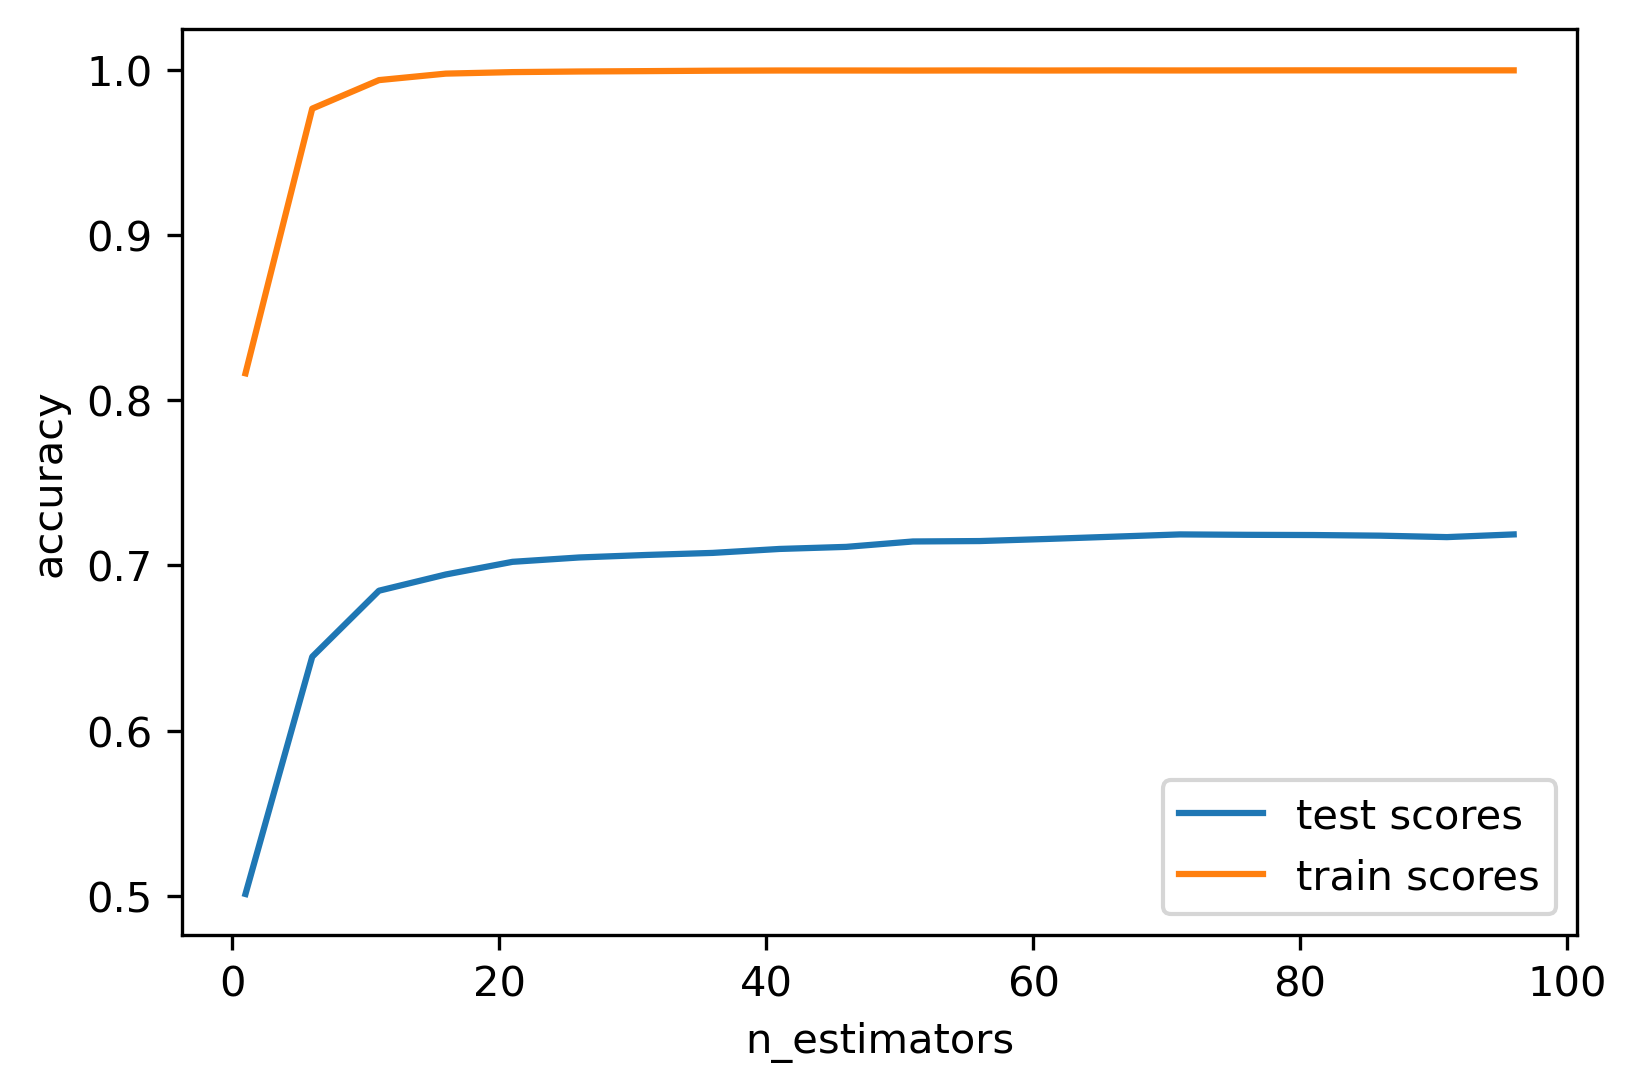

In [19]:

plt.plot(estimator_range, test_scores, label="test scores")
plt.plot(estimator_range, train_scores, label="train scores")
plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.legend()

In [20]:
#Put Random Forest Classifier together in a pipeline and obtain classification report:

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.2, shuffle=True, random_state=42)

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   brazilian       0.84      0.50      0.63        84
     british       0.57      0.20      0.30       157
cajun_creole       0.83      0.59      0.69       328
     chinese       0.69      0.88      0.77       510
    filipino       0.69      0.47      0.56       136
      french       0.55      0.50      0.52       550
       greek       0.77      0.48      0.59       249
      indian       0.81      0.88      0.84       602
       irish       0.70      0.28      0.40       151
     italian       0.68      0.91      0.78      1567
    jamaican       0.96      0.30      0.45        91
    japanese       0.80      0.60      0.68       284
      korean       0.92      0.61      0.74       166
     mexican       0.80      0.91      0.85      1336
    moroccan       0.86      0.53      0.66       166
     russian       0.66      0.24      0.35        89
 southern_us       0.61      0.72      0.66       848
     spanish       0.58    

In [27]:
#Create prediction function based on Random Forest Classifier:

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train.ravel())

rf_model_predict = rf_model.predict(X_test)
print(rf_model_predict)

['chinese' 'italian' 'greek' ... 'chinese' 'indian' 'southern_us']
